Question 1

In statistics, the theoretical linear regression model is used for predicting a continuous outcome based on a single predictor(X). X is an independent variable that is used to predict the outcome(Y), and Y is a dependent variable. On the other hand, 𝛽0 is the intercept; in other words the value of Y when X=0, while 𝛽1 is the slope where it describes the rate of change of Y in respect to X. Error Term (𝜖) represents the variation in Y that is not explained by the linear relationship with X, and in the case of a theoretical linear regression model the error term is assumed to be normally distributed with a mean of 0 and some variance 𝜎^2. Y is assumed to follow a normal distribution, with the mean determined by the linear relationship 𝛽0 + 𝛽1𝑋, with variance 𝜎^2. Thus, the theoretical linear regression model predicts how X influences Y in a linear relationship with some error to form a sample with normal distribution.

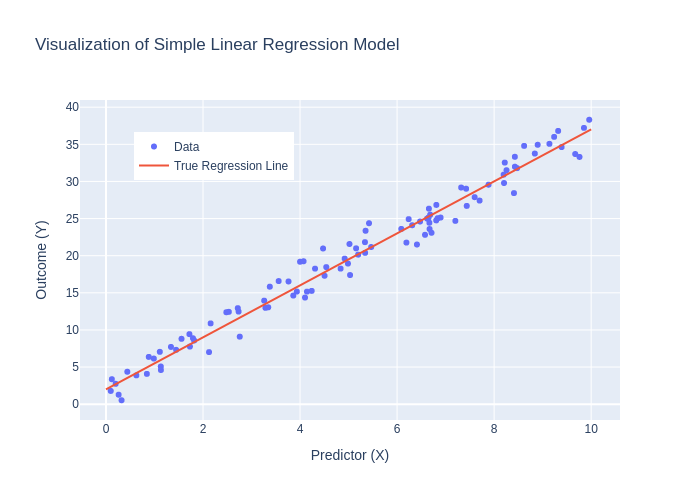

In [6]:
import numpy as np
from scipy.stats import norm, uniform
import plotly.graph_objects as go

# Parameters for the Simple Linear Regression model
n = 100              # Number of observations
beta0 = 2.0          # Intercept
beta1 = 3.5          # Slope
sigma = 1.5          # Standard deviation of the error term

# Generate predictor values x from a uniform distribution
x = uniform.rvs(0, 10, size=n)  # Values in the range [0, 10]

# Generate error terms epsilon from a normal distribution
epsilon = norm.rvs(0, sigma, size=n)

# Calculate the outcome variable Y using the Simple Linear Regression model
Y = beta0 + beta1 * x + epsilon

# Create a scatter plot to visualize the data points and the true line
fig = go.Figure()

# Add data points
fig.add_trace(go.Scatter(x=x, y=Y, mode='markers', name='Data'))

# Plot the theoretical regression line (without error)
x_line = np.linspace(0, 10, 100)  # X values for the regression line
y_line = beta0 + beta1 * x_line   # Corresponding Y values for the regression line
fig.add_trace(go.Scatter(x=x_line, y=y_line, mode='lines', name='True Regression Line'))

# Update layout for clarity
fig.update_layout(
    title="Visualization of Simple Linear Regression Model",
    xaxis_title="Predictor (X)",
    yaxis_title="Outcome (Y)",
    legend=dict(x=0.1, y=0.9)
)

# Show the plot
fig.show(renderer="png")


Question 2

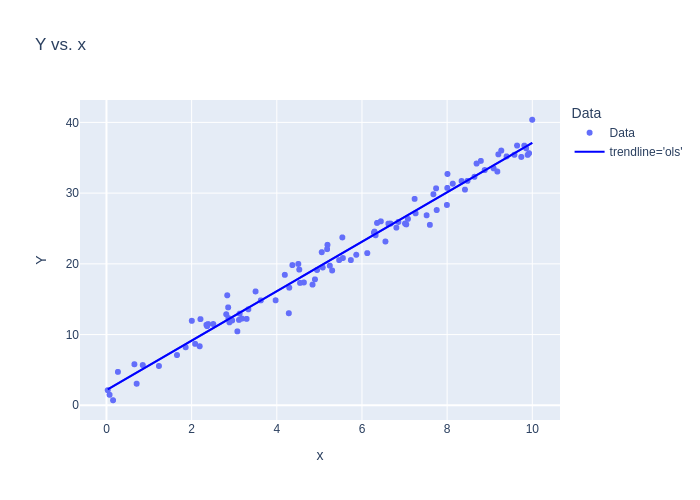

In [2]:
import pandas as pd
import statsmodels.formula.api as smf  # This library is for running statistical models, like OLS regression.
import plotly.express as px  # This is a plotting library for interactive data visualization.

# Combine x and Y into a pandas DataFrame
df = pd.DataFrame({'x': x, 'Y': Y})

# Specify and fit the OLS model
# This step sets up the formula "Y ~ x" to specify Y as the outcome and x as the predictor
model_data_specification = smf.ols("Y ~ x", data=df)  # This line specifies the model (Y as a function of x).
fitted_model = model_data_specification.fit()          # This line fits the model to the data.

# Summary and additional information
fitted_model.summary()  # Provides a comprehensive summary of the regression results, including coefficients, p-values, R-squared, etc.
fitted_model.summary().tables[1]  # Provides a table with parameter estimates (coefficients), standard errors, t-values, and p-values.
fitted_model.params  # Provides the estimated values for the intercept and slope coefficients in the model.
fitted_model.params.values  # Provides the parameter values as a simple list of values, without index labels.
fitted_model.rsquared  # Provides the R-squared value, which represents the proportion of variance in Y explained by x.

# Create a new column in df for Plotly to handle legend categories
df['Data'] = 'Data'  # This creates a column that labels all data points as "Data" for use in the legend.

# Plot the data and fitted regression line
fig = px.scatter(df, x='x', y='Y', color='Data', trendline='ols', title='Y vs. x')
# Note: trendline='ols' fits an OLS trendline on the plot based on the data, which can be visually compared to the fitted model.

# Add the fitted regression line to the plot manually (this essentially replicates the trendline='ols' above)
fig.add_scatter(x=df['x'], y=fitted_model.fittedvalues, line=dict(color='blue'), name="trendline='ols'")

# Show the plot
fig.show(renderer="png")  # Use fig.show(renderer="png") for GitHub or MarkUs submissions.


Question 3

The difference between the two lines in questions 1 and 2 would be that in the first one, it shows how the data will look like if it followed the linear model perfectly, with the data being simulated with the a priori chosen parameters. On the other hand, the second line treats the dataset as observed data, and estimates the intersept and slope. This is done by fitting an Ordinary Least Squares regresssion. Since the parameters are unknown, we use the data to estimate them and find the best-fitting line. Considering these two different models, if we were to simulate random sample variation with the theoretical model, we can see that it will resemble the fitted model-because resampling numerous times will generate the distribution of estimated parameters, which will then converge toward the theoretical model’s true parameters.

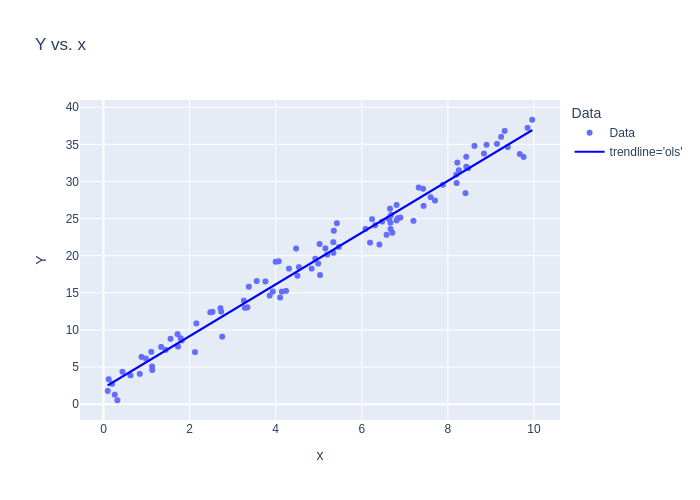

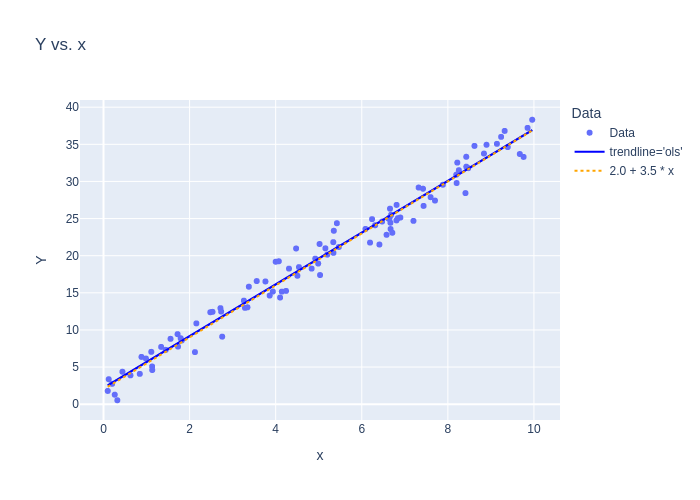

In [7]:
import pandas as pd
import statsmodels.formula.api as smf  # This library is for running statistical models, like OLS regression.
import plotly.express as px  # This is a plotting library for interactive data visualization.

# Combine x and Y into a pandas DataFrame
df = pd.DataFrame({'x': x, 'Y': Y})

# Specify and fit the OLS model
# This step sets up the formula "Y ~ x" to specify Y as the outcome and x as the predictor
model_data_specification = smf.ols("Y ~ x", data=df)  # This line specifies the model (Y as a function of x).
fitted_model = model_data_specification.fit()          # This line fits the model to the data.

# Summary and additional information
fitted_model.summary()  # Provides a comprehensive summary of the regression results, including coefficients, p-values, R-squared, etc.
fitted_model.summary().tables[1]  # Provides a table with parameter estimates (coefficients), standard errors, t-values, and p-values.
fitted_model.params  # Provides the estimated values for the intercept and slope coefficients in the model.
fitted_model.params.values  # Provides the parameter values as a simple list of values, without index labels.
fitted_model.rsquared  # Provides the R-squared value, which represents the proportion of variance in Y explained by x.

# Create a new column in df for Plotly to handle legend categories
df['Data'] = 'Data'  # This creates a column that labels all data points as "Data" for use in the legend.

# Plot the data and fitted regression line
fig = px.scatter(df, x='x', y='Y', color='Data', trendline='ols', title='Y vs. x')
# Note: trendline='ols' fits an OLS trendline on the plot based on the data, which can be visually compared to the fitted model.

# Add the fitted regression line to the plot manually (this essentially replicates the trendline='ols' above)
fig.add_scatter(x=df['x'], y=fitted_model.fittedvalues, line=dict(color='blue'), name="trendline='ols'")

# Show the plot
fig.show(renderer="png")  # Use fig.show(renderer="png") for GitHub or MarkUs submissions.
# what does this add onto the figure in constrast to `trendline='ols'`?
x_range = np.array([df['x'].min(), df['x'].max()])
# beta0 and beta1 are assumed to be defined
y_line = beta0 + beta1 * x_range
fig.add_scatter(x=x_range, y=y_line, mode='lines',
                name=str(beta0)+' + '+str(beta1)+' * x', 
                line=dict(dash='dot', color='orange'))

fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

Question 4

In the fitted linear regression model, fitted_model.params gives the estimated intercept and slope. Then by using the estimated parameters, fitted_model.fittedvalues gives us the Y values based on each X values. In other words, fitted_model.fittedvalues is the output of the equation applied to each data point in x, using the estimated coefficients from fitted_model.params.

Question 5

The line chosen for the fitted model based on observed data using the "ordinary least squares (OLS)" method is the best-fitting line that minimizes the sum of squared residuals. Note the residuals are the differences between the observed values of 𝑌𝑖 and the predicted values 𝑌𝑖. The reason why it requires squares is because the OLS method minimizes the sum of the squared residuals. It ensures that residuals don't cancel each other out, and it also emphasizes larger deviations between the observed and predicted values-and in turn gives more weight to outliers. For example in the scatter plot shown below, the orange line represents the theoretical linear regression model, and the blue line represents the best-fitting line resulted from the OLS method. While the red line represents the residuals, and the black line represents the mean of the observed Y values.

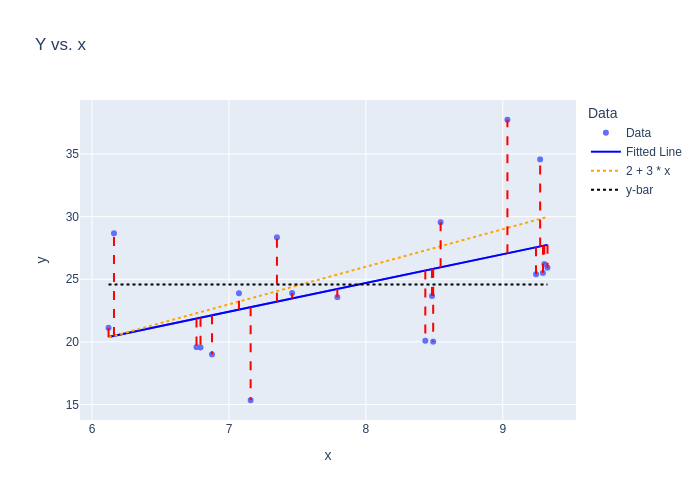

In [5]:
import scipy.stats as stats
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import plotly.express as px

n, x_min, x_range, beta0, beta1, sigma = 20, 5, 5, 2, 3, 5
x = stats.uniform(x_min, x_range).rvs(size=n)
errors = stats.norm(loc=0, scale=sigma).rvs(size=n)
Y = beta0 + beta1 * x + errors

df = pd.DataFrame({'x': x, 'y': Y})

# Define and fit the model
model_data_specification = smf.ols("y ~ x", data=df)
fitted_model = model_data_specification.fit()

# Add the 'Data' column for the color legend
df['Data'] = 'Data'  

# Create scatter plot with the correct column name 'y' in lowercase
fig = px.scatter(df, x='x', y='y', color='Data', trendline='ols', title='Y vs. x')

# Add fitted line based on model's fitted values
fig.add_scatter(x=df['x'], y=fitted_model.fittedvalues,
                line=dict(color='blue'), name="Fitted Line")

# Add the theoretical regression line
x_range = np.array([df['x'].min(), df['x'].max()])
y_line = beta0 + beta1 * x_range
fig.add_scatter(x=x_range, y=y_line, mode='lines',
                name=str(beta0)+' + '+str(beta1)+' * x',
                line=dict(dash='dot', color='orange'))

# Add vertical lines for residuals
for i in range(len(df)):
    fig.add_scatter(x=[df['x'][i], df['x'][i]],
                    y=[fitted_model.fittedvalues[i], df['y'][i]],
                    mode='lines',
                    line=dict(color='red', dash='dash'),
                    showlegend=False)

# Add a horizontal line at the mean of 'y'
fig.add_scatter(x=x_range, y=[df['y'].mean()] * 2, mode='lines',
                line=dict(color='black', dash='dot'), name='y-bar')

# Show the plot
fig.show(renderer="png")


Question 6

If we were to consider the expression 1-((Y-fitted_model.fittedvalues)**2).sum()/((Y-Y.mean())**2).sum(), we notice that ((Y-Y.mean())**2).sum() represents the total variation in Y(how much each observed Y deviates from the mean of Y), and ((Y-fitted_model.fittedvalues)**2).sum() represents the unexplained variation(sum of squared residuals). From here, we notice that the whole expression represents "the proportion of variation in (outcome) Y explained by the model" because it describes the accuracy of the model. This is also known as R^2, or the coefficient of determination. On the other hand, fitted_model.rsquared directly computes R^2(using the same formula as the first expression), and ranges from 0 to 1, 0 meaning the model explains none of the variation in Y, and 1 meaning the model explains all of the variation in Y. Therefore, fitted_model.rsquared can be interpreted as a measure of the accuracy of the model. While the example np.corrcoef(Y,fitted_model.fittedvalues[0,1]**2 in he context of simple linear regression models calculates the square of the correlation coefficient between Y and fitted_model.fittedvalues; while np.corrcoef(Y,x)[0,1]**2 calculates the square of the correlation coefficient between Y and X.

Question 7

An assumption of the Simple Linear Regression model specification that do not seem compatible with the example data below are that the relationship between X and Y are linear; instead the scatter plot suggests that it may be non-linear because it seems Y is increasing at a greater rate than what a linear relationship would. 

Another assumption would be that residuals should be constant with all values of X(homoscedasticity); however in the example below it appears that as the value of X increases, the variance of residuals increases, indicating heteroscedasticity. 

Also another thing we can note is that the assumption of the residuals being normally distributed seems to be violated, in that the histogram of residuals is skewed to the right, indicating this is  non-linear relationship. 

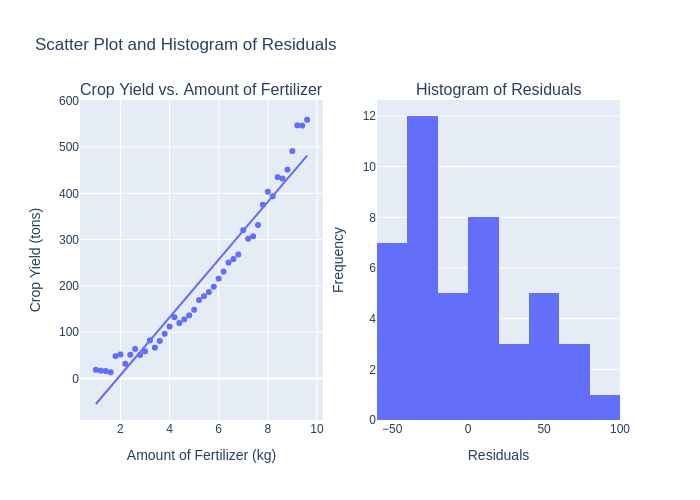

In [8]:
import pandas as pd
from scipy import stats
import plotly.express as px
from plotly.subplots import make_subplots

# This data shows the relationship between the amount of fertilizer used and crop yield
data = {'Amount of Fertilizer (kg) (x)': [1, 1.2, 1.4, 1.6, 1.8, 2, 2.2, 2.4, 2.6, 
                                          2.8, 3, 3.2, 3.4, 3.6, 3.8, 4, 4.2, 4.4, 
                                          4.6, 4.8, 5, 5.2, 5.4, 5.6, 5.8, 6, 6.2, 
                                          6.4, 6.6, 6.8, 7, 7.2, 7.4, 7.6, 7.8, 8, 
                                          8.2, 8.4, 8.6, 8.8,9, 9.2, 9.4, 9.6],
        'Crop Yield (tons) (Y)': [18.7, 16.9, 16.1, 13.4, 48.4, 51.9, 31.8, 51.3, 
                                  63.9, 50.6, 58.7, 82.4, 66.7, 81.2, 96.5, 112.2, 
                                  132.5, 119.8, 127.7, 136.3, 148.5, 169.4, 177.9, 
                                  186.7, 198.1, 215.7, 230.7, 250.4, 258. , 267.8, 
                                  320.4, 302. , 307.2, 331.5, 375.3, 403.4, 393.5,
                                  434.9, 431.9, 451.1, 491.2, 546.8, 546.4, 558.9]}
df = pd.DataFrame(data)
fig1 = px.scatter(df, x='Amount of Fertilizer (kg) (x)', y='Crop Yield (tons) (Y)',
                  trendline='ols', title='Crop Yield vs. Amount of Fertilizer')
# Perform linear regression using scipy.stats
slope, intercept, r_value, p_value, std_err = \
    stats.linregress(df['Amount of Fertilizer (kg) (x)'], df['Crop Yield (tons) (Y)'])
# Predict the values and calculate residuals
y_hat = intercept + slope * df['Amount of Fertilizer (kg) (x)']
residuals = df['Crop Yield (tons) (Y)'] - y_hat
df['Residuals'] = residuals
fig2 = px.histogram(df, x='Residuals', nbins=10, title='Histogram of Residuals',
                    labels={'Residuals': 'Residuals'})

fig = make_subplots(rows=1, cols=2,
                    subplot_titles=('Crop Yield vs. Amount of Fertilizer', 
                                    'Histogram of Residuals'))
for trace in fig1.data:
    fig.add_trace(trace, row=1, col=1)
for trace in fig2.data:
    fig.add_trace(trace, row=1, col=2)
fig.update_layout(title='Scatter Plot and Histogram of Residuals',
    xaxis_title='Amount of Fertilizer (kg)', yaxis_title='Crop Yield (tons)',
    xaxis2_title='Residuals', yaxis2_title='Frequency', showlegend=False)

fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

Question 8

The null hypothesis would be H0:β1=0, in other words, there is no linear association between the waiting time between eruptions and the duration of eruptions for the Old Faithful Geyser. Since the p-value is 0.00 for the predictor variable waiting, there is very strong evidence against the null hypothesis. Thus we accept the alternateive hypothesis: that β1 does not equal 0 and there is a linear association between the waiting time between eruptions and the duration of eruptions for the Old Faitful Geyser.

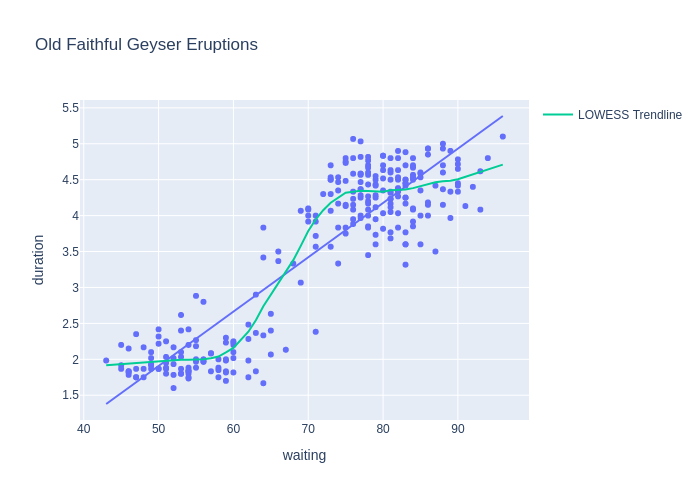

In [9]:
import plotly.express as px
import seaborn as sns
import statsmodels.api as sm

# The "Classic" Old Faithful Geyser dataset: ask a ChatBot for more details if desired
old_faithful = sns.load_dataset('geyser')

# Create a scatter plot with a Simple Linear Regression trendline
fig = px.scatter(old_faithful, x='waiting', y='duration', 
                 title="Old Faithful Geyser Eruptions", 
                 trendline='ols')#'lowess'

# Add a smoothed LOWESS Trendline to the scatter plot
lowess = sm.nonparametric.lowess  # Adjust 'frac' to change "smoothness bandwidth"
smoothed = lowess(old_faithful['duration'], old_faithful['waiting'], frac=0.25)  
smoothed_df = pd.DataFrame(smoothed, columns=['waiting', 'smoothed_duration'])
fig.add_scatter(x=smoothed_df['waiting'], y=smoothed_df['smoothed_duration'], 
                mode='lines', name='LOWESS Trendline')

fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

In [3]:
import seaborn as sns
import statsmodels.formula.api as smf

# The "Classic" Old Faithful Geyser dataset
old_faithful = sns.load_dataset('geyser')

linear_for_specification = 'duration ~ waiting'
model = smf.ols(linear_for_specification, data=old_faithful)
fitted_model = model.fit()
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               duration   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     1162.
Date:                Thu, 07 Nov 2024   Prob (F-statistic):          8.13e-100
Time:                        21:46:21   Log-Likelihood:                -194.51
No. Observations:                 272   AIC:                             393.0
Df Residuals:                     270   BIC:                             400.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.8740      0.160    -11.702      0.000      -2.189      -1.559
waiting        0.0756      0.002     34.089      0.000       0.071       0.080
==============================================================================
Omnibus:                        4.133   Durbin-Watson:                   2.561
Prob(Omnibus):                  0.127   Jarque-Bera (JB):                3.173
Skew:                          -0.138   Prob(JB):                        0.205
Kurtosis:                       2.548   Cond. No.                         384.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Question 9

The null hypothesis would be H0:β1=0, in other words, there is no linear association between the waiting time between eruptions and the duration of eruptions for the Old Faithful Geyser for short wait times less than 62, 64, and 66. 

The p-values when the wait time is 62, 64, and 66 are 0.238, 0.036, and 0.000 respectively. From here we can see that when the wait time is 62 there is no evidence against the null hypothesis, therefore we can accept the null hypothesis. 

When the wait time is 64 there is moderate evidence against the null hypothesis, so we can reject the null hypothesis-and therefore we can accept the alternative hypothesis: that β1 does not equal 0 and there is a linear association between the waiting time between eruptions and the duration of eruptions for the wait times less than 64. 

When the wait time is 66 there is very strong evidence against the null hypothesis, so we reject the null hypothesis and accept the alternative hypothesis: that β1 does not equal 0 and there is a linear association between the waiting time between eruptions and the duration of eruptions for wait times less than 66.

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.6401      0.309      5.306      0.000       1.025       2.255
waiting        0.0069      0.006      1.188      0.238      -0.005       0.019


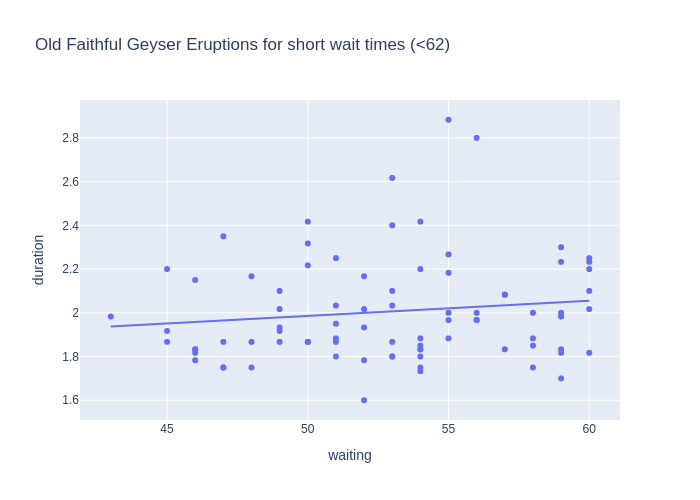

In [17]:
import plotly.express as px
import statsmodels.formula.api as smf


short_wait_limit = 62
short_wait = old_faithful.waiting < short_wait_limit

print(smf.ols('duration ~ waiting', data=old_faithful[short_wait]).fit().summary().tables[1])

# Create a scatter plot with a linear regression trendline
fig = px.scatter(old_faithful[short_wait], x='waiting', y='duration', 
                 title="Old Faithful Geyser Eruptions for short wait times (<"+str(short_wait_limit)+")", 
                 trendline='ols')

fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.4140      0.288      4.915      0.000       0.842       1.986
waiting        0.0114      0.005      2.127      0.036       0.001       0.022


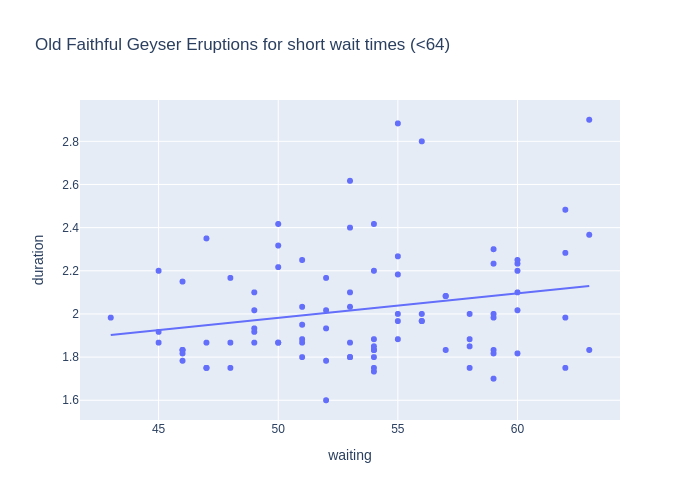

In [15]:
import plotly.express as px
import statsmodels.formula.api as smf


short_wait_limit = 64
short_wait = old_faithful.waiting < short_wait_limit

print(smf.ols('duration ~ waiting', data=old_faithful[short_wait]).fit().summary().tables[1])

# Create a scatter plot with a linear regression trendline
fig = px.scatter(old_faithful[short_wait], x='waiting', y='duration', 
                 title="Old Faithful Geyser Eruptions for short wait times (<"+str(short_wait_limit)+")", 
                 trendline='ols')

fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8619      0.327      2.637      0.010       0.213       1.511
waiting        0.0221      0.006      3.704      0.000       0.010       0.034


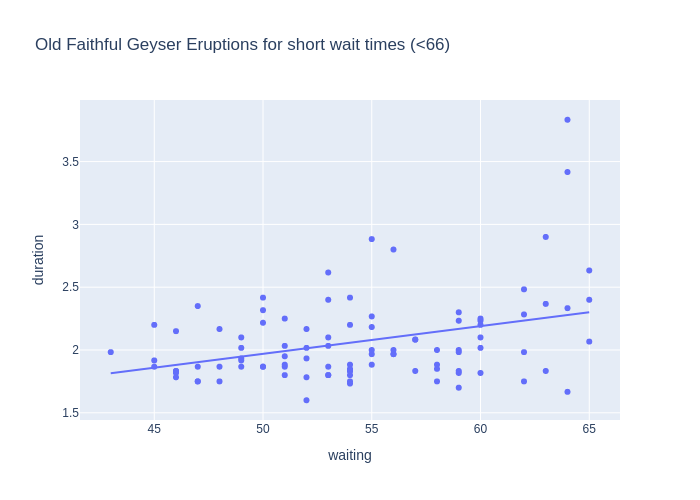

In [16]:
import plotly.express as px
import statsmodels.formula.api as smf


short_wait_limit = 66
short_wait = old_faithful.waiting < short_wait_limit

print(smf.ols('duration ~ waiting', data=old_faithful[short_wait]).fit().summary().tables[1])

# Create a scatter plot with a linear regression trendline
fig = px.scatter(old_faithful[short_wait], x='waiting', y='duration', 
                 title="Old Faithful Geyser Eruptions for short wait times (<"+str(short_wait_limit)+")", 
                 trendline='ols')

fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

Question 10

As shown below, 0 is not contained in the 95% confidence interval, and the simulated p-value matches smf.ols('duration ~ waiting', data=old_faithful[long_wait]).fit().summary().tables[1].

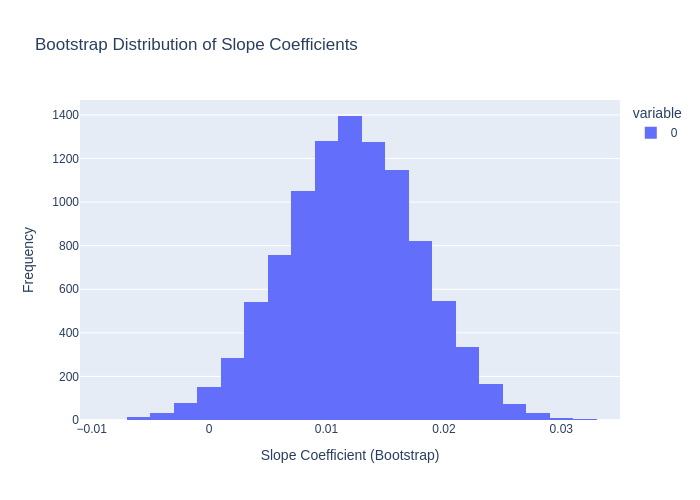

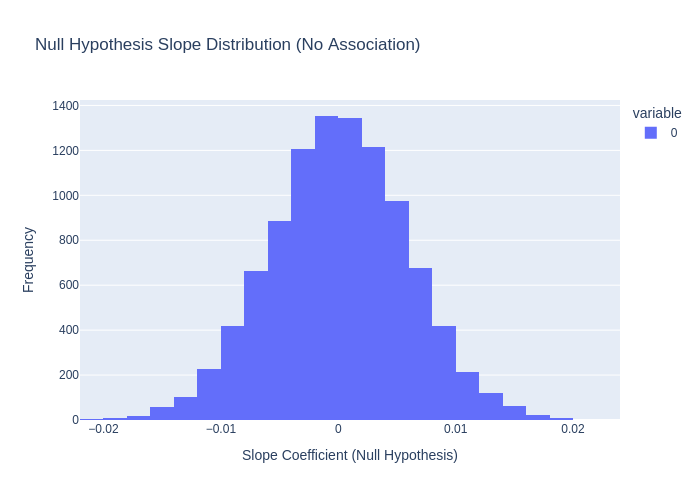

95% Bootstrap Confidence Interval for Slope: [0.00068618 0.02332893]
Simulated p-value under Null Hypothesis: 0.0362
p-value from observed data model: 0.038135755338567744


In [24]:
import pandas as pd
import numpy as np
from scipy import stats
import plotly.express as px
import statsmodels.formula.api as smf
import seaborn as sns

# Load Old Faithful dataset
old_faithful = sns.load_dataset('geyser')

# Filter for long wait times
long_wait_limit = 71
long_wait = old_faithful['waiting'] > long_wait_limit
long_wait_data = old_faithful[long_wait]

# Step 1: Bootstrap Sampling for Slope Coefficients
bootstrap_slopes = []
n_bootstrap_samples = 10000

for _ in range(n_bootstrap_samples):
    bootstrap_sample = long_wait_data.sample(n=160, replace=True)
    simulated_duration = 1.65 + 0 * long_wait_data['waiting'] + stats.norm(loc=0, scale=0.37).rvs(size=160)
    model = smf.ols('duration ~ waiting', data=bootstrap_sample).fit()
    bootstrap_slopes.append(model.params['waiting'])

# Visualize the bootstrap sampling distribution of the slope coefficients
fig = px.histogram(bootstrap_slopes, nbins=30, title="Bootstrap Distribution of Slope Coefficients")
fig.update_layout(xaxis_title="Slope Coefficient (Bootstrap)", yaxis_title="Frequency")
fig.show(renderer="png")

# Step 2: Simulate Samples Under Null Hypothesis (No Linear Association)
null_slope_simulations = []
n_simulation_samples = 10000

# Simulate data under null hypothesis model
for _ in range(n_simulation_samples):
    simulated_duration = 1.65 + 0 * long_wait_data['waiting'] + stats.norm(loc=0, scale=0.37).rvs(size=160)
    simulated_data = pd.DataFrame({'waiting': long_wait_data['waiting'], 'duration': simulated_duration})
    model = smf.ols('duration ~ waiting', data=simulated_data).fit()
    null_slope_simulations.append(model.params['waiting'])

# Visualize the sampling distribution of slope coefficients under the null hypothesis
fig = px.histogram(null_slope_simulations, nbins=30, title="Null Hypothesis Slope Distribution (No Association)")
fig.update_layout(xaxis_title="Slope Coefficient (Null Hypothesis)", yaxis_title="Frequency")
fig.show(renderer="png")

# Step 3: Compare Observed Slope with Bootstrap CI and Calculate Simulated p-value
observed_model = smf.ols('duration ~ waiting', data=long_wait_data).fit()
observed_slope = observed_model.params['waiting']

# Calculate 95% CI for bootstrap slopes
bootstrap_ci = np.quantile(bootstrap_slopes, [0.025, 0.975])
print("95% Bootstrap Confidence Interval for Slope:", bootstrap_ci)

# Calculate p-value from null hypothesis simulation
simulated_p_value = (np.abs(null_slope_simulations) >= np.abs(observed_slope)).mean()
print("Simulated p-value under Null Hypothesis:", simulated_p_value)

# Compare with the p-value from observed model
print("p-value from observed data model:", observed_model.pvalues['waiting'])


In [25]:
import seaborn as sns
import statsmodels.formula.api as smf

# Load the Old Faithful Geyser dataset
old_faithful = sns.load_dataset('geyser')

# Define the long wait limit and filter for long wait times
long_wait_limit = 71
long_wait = old_faithful['waiting'] > long_wait_limit

# Fit the OLS model on the subsetted data (long wait times)
model = smf.ols('duration ~ waiting', data=old_faithful[long_wait]).fit()

# Extract the p-value for the slope coefficient (second row, index 1)
p_value_ols = model.pvalues['waiting']  # Accesses the p-value for the 'waiting' variable

# Simulated p-value
simulated_p_value = 0.0362  # Replace this with the actual simulated p-value you've computed

# Display both p-values
print(f"OLS model p-value: {p_value_ols}")
print(f"Simulated p-value: {simulated_p_value}")

# Compare the two p-values
if abs(p_value_ols - simulated_p_value) < 0.01:  # Allows a small margin for variation
    print("The simulated p-value matches the OLS p-value.")
else:
    print("The simulated p-value does not match the OLS p-value.")


OLS model p-value: 0.038135755338567744
Simulated p-value: 0.0362
The simulated p-value matches the OLS p-value.


Question 11

For smf.ols('duration ~ waiting', data=old_faithful), it considers the whole dataset. As for smf.ols('duration ~ waiting', data=old_faithful[short_wait]), this model only considers data with waiting time that are considered short. In the previous models short waiting times were set to less than 62, 64, and 66, while for the new model it is set to less than 64. As for smf.ols('duration ~ waiting', data=old_faithful[long_wait]), it only considers data with waiting times to be considered long, for the new model that would be anything above 71.

As shown below, the p-value is 0.00 for the new indicator variable, therefore we reject the null hypothesis "there is no difference between groups 'on average'", and accept the alternative hypothesis "there is a difference between groups 'on average'".

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.3520      0.476      7.049      0.000       2.413       4.291
waiting        0.0122      0.006      2.091      0.038       0.001       0.024


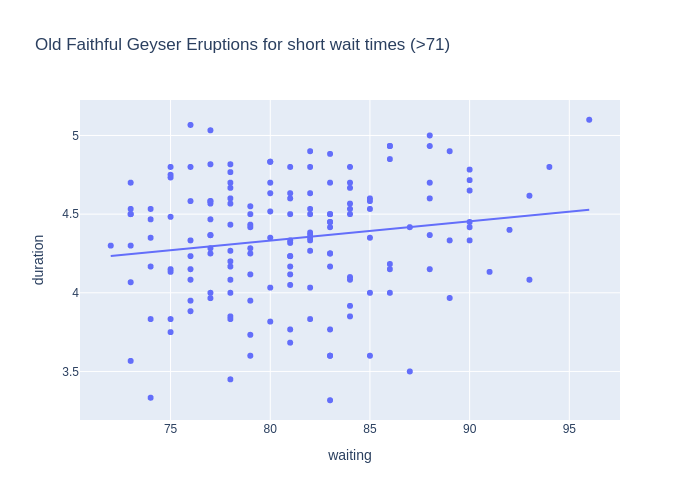

In [27]:
import plotly.express as px

long_wait_limit = 71
long_wait = old_faithful.waiting > long_wait_limit

print(smf.ols('duration ~ waiting', data=old_faithful[long_wait]).fit().summary().tables[1])

# Create a scatter plot with a linear regression trendline
fig = px.scatter(old_faithful[long_wait], x='waiting', y='duration', 
                 title="Old Faithful Geyser Eruptions for short wait times (>"+str(long_wait_limit)+")", 
                 trendline='ols')
fig.show(renderer="png")

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,2.0943,0.041,50.752,0.000,2.013,2.176
"C(kind, Treatment(reference=""short""))[T.long]",2.2036,0.052,42.464,0.000,2.101,2.306


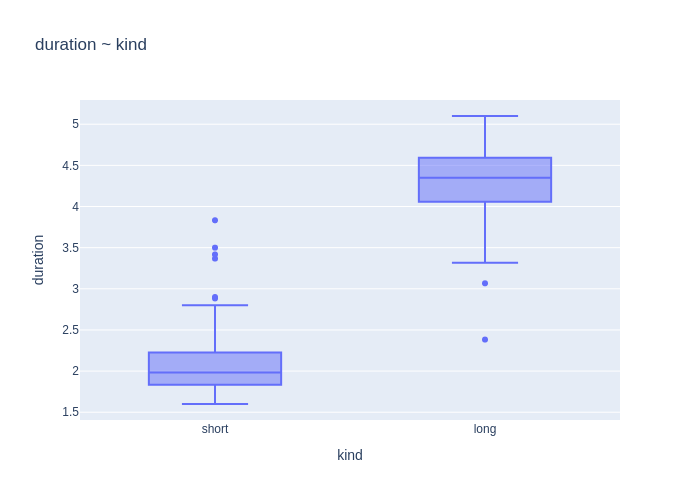

In [13]:
from IPython.display import display

display(smf.ols('duration ~ C(kind, Treatment(reference="short"))', data=old_faithful).fit().summary().tables[1])

fig = px.box(old_faithful, x='kind', y='duration', 
             title='duration ~ kind',
             category_orders={'kind': ['short', 'long']})
fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

Question 12

Of the four histograms shown below, model 1 is the most plausible that the distribution of error terms is normal, because in models 2 and 3 they are skewed while model 4 has most of the data in the centre due to splitting short and long wait data, therefore the error terms are not normally distributed. 

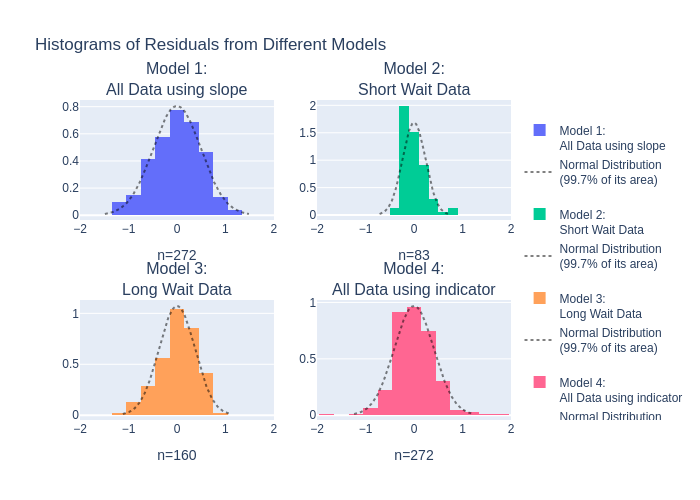

In [28]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from scipy import stats
import numpy as np

model_residuals = {
    '<br>Model 1:<br>All Data using slope': smf.ols('duration ~ waiting', data=old_faithful).fit().resid,
    '<br>Model 2:<br>Short Wait Data': smf.ols('duration ~ waiting', data=old_faithful[short_wait]).fit().resid,
    '<br>Model 3:<br>Long Wait Data': smf.ols('duration ~ waiting', data=old_faithful[long_wait]).fit().resid,
    '<br>Model 4:<br>All Data using indicator': smf.ols('duration ~ C(kind, Treatment(reference="short"))', data=old_faithful).fit().resid
}

fig = make_subplots(rows=2, cols=2, subplot_titles=list(model_residuals.keys()))
for i, (title, resid) in enumerate(model_residuals.items()):

    if i == 1:  # Apply different bins only to the second histogram (index 1)
        bin_size = dict(start=-1.9, end=1.9, size=0.2)
    else:
        bin_size = dict(start=-1.95, end=1.95, size=0.3)

    fig.add_trace(go.Histogram(x=resid, name=title, xbins=bin_size, histnorm='probability density'), 
                  row=int(i/2)+1, col=(i%2)+1)
    fig.update_xaxes(title_text="n="+str(len(resid)), row=int(i/2)+1, col=(i%2)+1)    
    
    normal_range = np.arange(-3*resid.std(),3*resid.std(),0.01)
    fig.add_trace(go.Scatter(x=normal_range, mode='lines', opacity=0.5,
                             y=stats.norm(loc=0, scale=resid.std()).pdf(normal_range),
                             line=dict(color='black', dash='dot', width=2),
                             name='Normal Distribution<br>(99.7% of its area)'), 
                  row=int(i/2)+1, col=(i%2)+1)
    
fig.update_layout(title_text='Histograms of Residuals from Different Models')
fig.update_xaxes(range=[-2,2])
fig.show(renderer="png")

Question 13

For the permutation test, it first calculates the differnce of the mean duration between the short and long wait groups. Then it shuffles the kind column then computes the difference in the means of the duration for the shuffled groups. Then the p-value for the proportion of permuted mean differences that are greater than or equal to the observed mean difference in absolute value is computated.

As for the bootstrap simulation, it bootstraps the short and long wait groups, then compute the mean difference between the short and long groups for each bootstrap sample. Then np.quantile is used to calculate the 95% confidence interval for the mean differences.

This approach is similar to the one found in question 11 in that it separates the data into two groups short and long, and the p-value for the permutation test and the one in question 11 both tell us if the observed mean difference is consistent with the null hypothesis (no difference between the groups). However for this model, it also uses bootstrapping to find a range of plausible values for the mean difference between the groups with random sampling.

In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf

# Load the Old Faithful Geyser dataset
old_faithful = sns.load_dataset('geyser')

# Define short and long wait times based on a threshold
long_wait_limit = 71
long_wait = old_faithful.waiting > long_wait_limit
short_wait = old_faithful.waiting <= long_wait_limit

# Add a column to indicate 'kind' (short or long wait)
old_faithful['kind'] = np.where(long_wait, 'long', 'short')

# Step 1: Permutation Test
# Compute the observed mean difference between short and long wait groups
observed_statistic = old_faithful.groupby('kind')['duration'].mean().iloc[::-1].diff().values[1]

# Shuffle the 'kind' column and calculate the mean difference for the shuffled groups
np.random.seed(42)  # For reproducibility
n_permutations = 10000
permuted_differences = []

for _ in range(n_permutations):
    # Shuffle the 'kind' column
    shuffled_data = old_faithful.assign(kind_shuffled=old_faithful['kind'].sample(n=len(old_faithful), replace=False).values)
    
    # Calculate the mean difference for the shuffled groups
    permuted_diff = shuffled_data.groupby('kind_shuffled')['duration'].mean().iloc[::-1].diff().values[1]
    permuted_differences.append(permuted_diff)

# Step 2: Bootstrap Confidence Interval
# Bootstrap sample within each group (short and long wait) and compute the mean difference
bootstrapped_mean_differences = []

n_bootstrap = 10000
for _ in range(n_bootstrap):
    # Resample with replacement within each group
    short_sample = old_faithful[short_wait].sample(n=short_wait.sum(), replace=True)
    long_sample = old_faithful[long_wait].sample(n=long_wait.sum(), replace=True)
    
    # Compute the mean difference for this bootstrap sample
    bootstrap_diff = short_sample['duration'].mean() - long_sample['duration'].mean()
    bootstrapped_mean_differences.append(bootstrap_diff)

# Step 3: Calculate the 95% Confidence Interval from the Bootstrapped Differences
confidence_interval = np.quantile(bootstrapped_mean_differences, [0.025, 0.975])

# Print results
print(f'Observed mean difference (short - long): {observed_statistic:.4f}')
print(f'95% Bootstrap Confidence Interval: {confidence_interval}')

# Step 4: Compare the observed statistic to the permutation distribution
permuted_differences = np.array(permuted_differences)
p_value = np.mean(np.abs(permuted_differences) >= np.abs(observed_statistic))

print(f'Permutation test p-value: {p_value:.4f}')


Observed mean difference (short - long): 2.0802
95% Bootstrap Confidence Interval: [-2.20605279 -1.9457858 ]
Permutation test p-value: 0.0000


Question 14

Yes!

Certainly! Here's a summary of our interactions starting from the prompt about explaining the theoretical Simple Linear Regression model:

### **Summary of Interactions:**

1. **Understanding Simple Linear Regression (SLR):**
   - You asked for an explanation of the theoretical Simple Linear Regression model, including the components like the predictor variable, outcome variable, slope and intercept coefficients, and the error term. 
   - The model was explained as: 
     \[
     y = \beta_0 + \beta_1 x + \epsilon
     \]
     where:
     - \( y \) is the outcome (dependent) variable.
     - \( x \) is the predictor (independent) variable.
     - \( \beta_0 \) is the intercept.
     - \( \beta_1 \) is the slope coefficient.
     - \( \epsilon \) is the error term, representing random variation around the model.

2. **Exploring the Normal Distribution and Residuals:**
   - We discussed how Simple Linear Regression assumes that the error term (\( \epsilon \)) is drawn from a normal distribution with a mean of zero and constant variance (homoscedasticity).
   - You were introduced to the idea that residuals (the differences between observed and predicted values) in regression should ideally follow a normal distribution. This is important for hypothesis testing and inference.
   
3. **Analyzing the Old Faithful Geyser Data:**
   - You worked with the Old Faithful Geyser dataset and performed linear regression on it, analyzing the relationship between waiting time and eruption duration.
   - You learned how to create a scatter plot and fitted regression line, interpret the results, and inspect the normality of residuals through visualizations and histograms.
   - We also explored different models (e.g., using only short or long wait times) and how to interpret the results of regression for each group.
   
4. **Bootstrapping and Permutation Testing:**
   - You performed bootstrapping to visualize the sampling distribution of slope coefficients for linear regression models.
   - You also learned how to conduct permutation testing, where the null hypothesis is that the means of short and long wait groups are the same.
   - Through bootstrapping and permutation tests, you were able to calculate p-values and confidence intervals, allowing you to assess the significance of your results under different assumptions.

5. **Model Comparisons and Adjustments:**
   - We compared models using different datasets (all data, short wait data, long wait data) and also using categorical indicators for different groups (e.g., the `kind` variable).
   - You examined how the inclusion of specific subsets of data (short vs. long wait) influenced the regression results, such as slope estimates, and visualized the residual distributions to assess normality.

6. **Error Term and Normality Assessment:**
   - We explored different ways to evaluate whether the error terms (residuals) were normally distributed for each regression model.
   - You were shown how to visually compare the residual histograms to a normal distribution and how to perform statistical tests (like the Shapiro-Wilk test) to confirm or reject the assumption of normality.

7. **Final Visualizations and Tests:**
   - You generated visualizations comparing the residuals from different models, along with overlays of the normal distribution curve.
   - You were introduced to the possibility of using statistical tests to assess the normality of residuals and how to interpret these tests in the context of regression analysis.

### **Key Concepts Covered:**
- **Simple Linear Regression (SLR)**: A method for modeling the relationship between two variables by fitting a straight line.
- **Error Terms and Normality**: The assumption that error terms are normally distributed is crucial for hypothesis testing and inference in regression models.
- **Residuals Analysis**: Evaluating whether residuals follow a normal distribution through histograms and normality tests.
- **Bootstrapping and Permutation Testing**: Techniques to assess the sampling distribution of statistics like slope coefficients and conduct hypothesis tests under different assumptions.
- **Model Comparison**: Comparing regression models for subsets of data (e.g., short vs. long wait times) and interpreting the differences.

### **Outcome:**
- You gained practical skills in applying and interpreting Simple Linear Regression models to real-world data (Old Faithful Geyser dataset).
- You also gained understanding in how to validate model assumptions (normality of residuals) and perform resampling techniques (bootstrapping, permutation tests) to assess the significance of your findings.

Let me know if you'd like further clarifications on any of these topics!

https://chatgpt.com/share/672d784c-992c-8011-a942-42df994e860f